In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

## Task 2.1

In [2]:
data = np.load('Iris_data.npy')
labels = np.load('Iris_labels.npy')

In [3]:
print (data.shape)

(150, 4)


In [4]:
print (labels.shape)

(150,)


There is 150 samples which are all assigned a label, indicating which flower set they belong to. There are 4 features in the data set that can be plotted on a graph against each other to determine what flower set a sample belongs to.

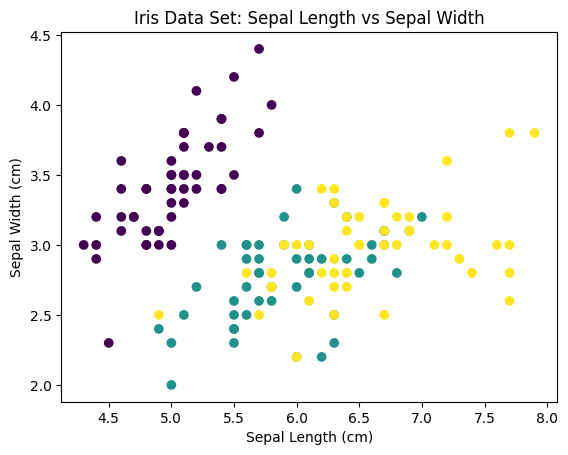

In [5]:
x_feature = data[:, 0]
y_feature = data[:, 1]
feature_labels = labels

plt.scatter(x_feature, y_feature, c = feature_labels)
plt.title("Iris Data Set: Sepal Length vs Sepal Width")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.show()

## Task 2.2

The code that is about to follow will construct a k-means algortihm aimed at creating clusters for the species of flower without the labels.

In [6]:
kmeans = KMeans(n_clusters=3,n_init=100)
cluster_labels = kmeans.fit_predict(data)

In [7]:
centroids = kmeans.cluster_centers_

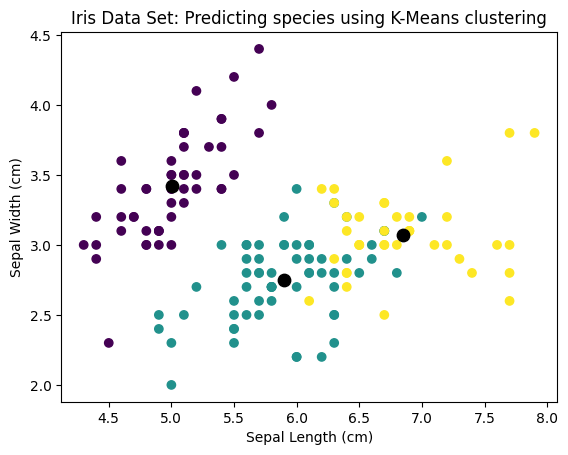

In [8]:
plt.scatter(x_feature, y_feature, c = cluster_labels)
plt.scatter(centroids[:,0], centroids[:,1], s = 80, color = 'k')
plt.title("Iris Data Set: Predicting species using K-Means clustering")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.show()

init{‘k-means++’, ‘random’}, callable or array-like of shape (n_clusters, n_features), default=’k-means++’
Method for initialization:

‘k-means++’ : selects initial cluster centroids using sampling based on an empirical probability distribution of the points’ contribution to the overall inertia. This technique speeds up convergence. The algorithm implemented is “greedy k-means++”. It differs from the vanilla k-means++ by making several trials at each sampling step and choosing the best centroid among them.

‘random’: choose n_clusters observations (rows) at random from data for the initial centroids.

If an array is passed, it should be of shape (n_clusters, n_features) and gives the initial centers.

If a callable is passed, it should take arguments X, n_clusters and a random state and return an initialization.

n_init‘auto’ or int, default=’auto’
Number of times the k-means algorithm is run with different centroid seeds. The final results is the best output of n_init consecutive runs in terms of inertia. Several runs are recommended for sparse high-dimensional problems (see Clustering sparse data with k-means).

When n_init='auto', the number of runs depends on the value of init: 10 if using init='random' or init is a callable; 1 if using init='k-means++' or init is an array-like.

## Task 2.3

The code to follow will use a Gaussian Mixture model, clustering our data with the posterior probabilities of g Gausssian distributions. We will again use all four of the available feature dimensions.

In [9]:
gm = GaussianMixture(n_components=3, init_params='k-means++', n_init=100)

In [10]:
gm_labels = gm.fit_predict(data)

In [11]:
gm_means = gm.means_

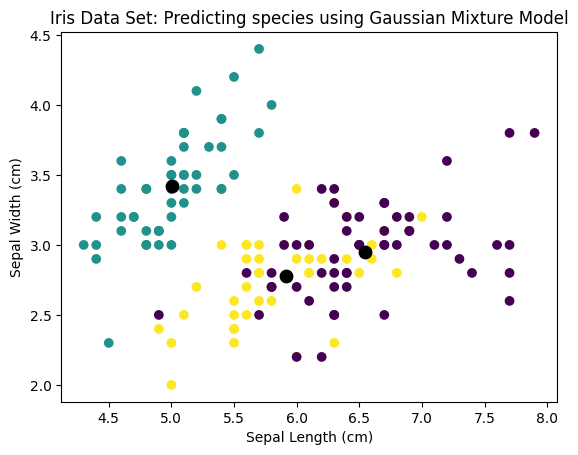

In [12]:
plt.scatter(x_feature, y_feature, c = gm_labels)
plt.scatter(gm_means[:,0], gm_means[:,1], s = 80, color = 'k')
plt.title("Iris Data Set: Predicting species using Gaussian Mixture Model")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.show()

In [13]:
posterior_probs = gm.predict_proba(data)

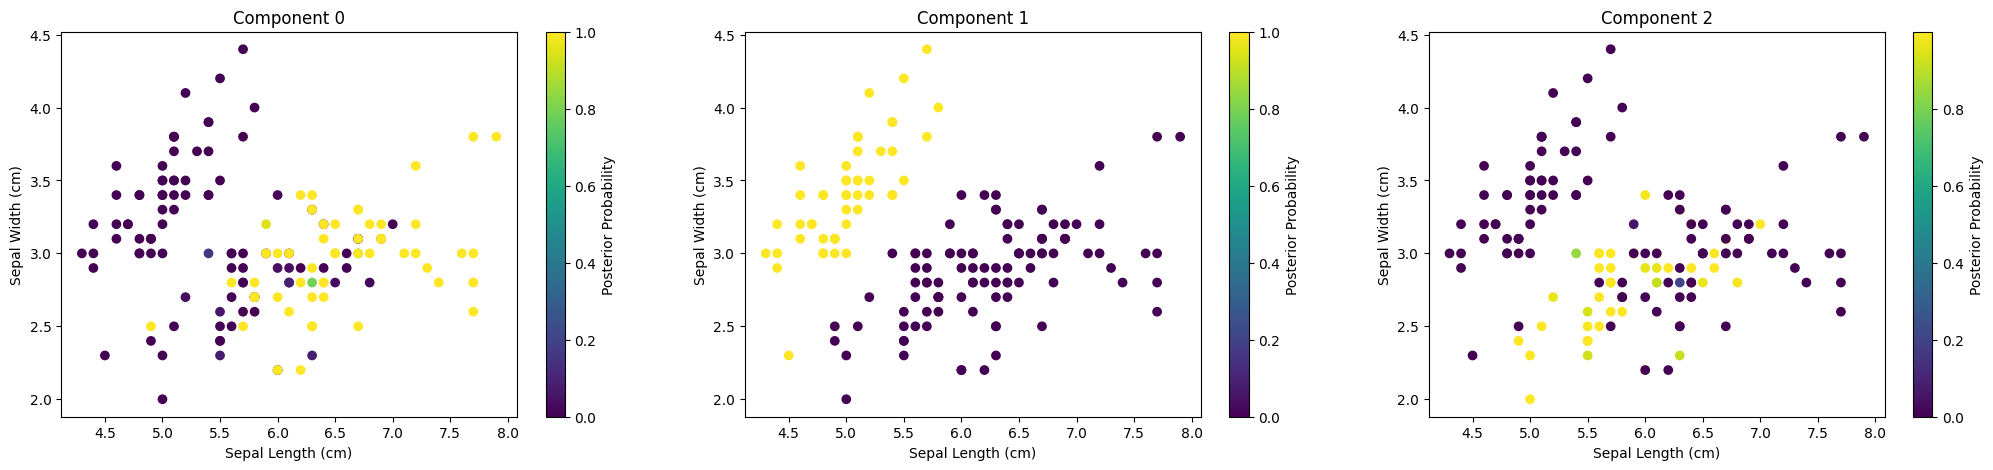

In [14]:
fig, axes = plt.subplots(1, 3, figsize=(25, 5))

for i in range(3): 
    sc = axes[i].scatter(data[:, 0], data[:, 1], c=posterior_probs[:, i], cmap='viridis')
    axes[i].set_title(f'Component {i}')
    axes[i].set_xlabel('Sepal Length (cm)')
    axes[i].set_ylabel('Sepal Width (cm)')
    
    plt.colorbar(sc, ax=axes[i], label='Posterior Probability')

plt.show()

## Task 2.4

In [15]:
taskdata = np.load('task2_4.npy')
print (taskdata.shape)

(100, 10)


In [16]:
taskx_feature = taskdata[:, 0]
tasky_feature = taskdata[:, 1]

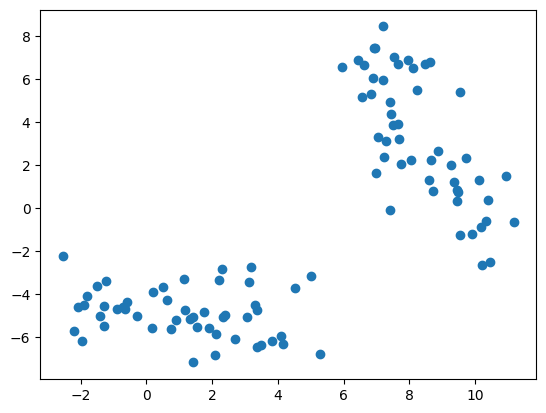

In [17]:
plt.scatter(taskx_feature, tasky_feature)

Initially looking at the data in a scatterplot would suggest that their is 2 clusters, however we know for a fact that there is more than that according to the lab sheet.

In [18]:
kmeanstask = KMeans(n_init=100, random_state=42)
taskcluster_labels = kmeanstask.fit_predict(taskdata)
taskcentroids = kmeanstask.cluster_centers_

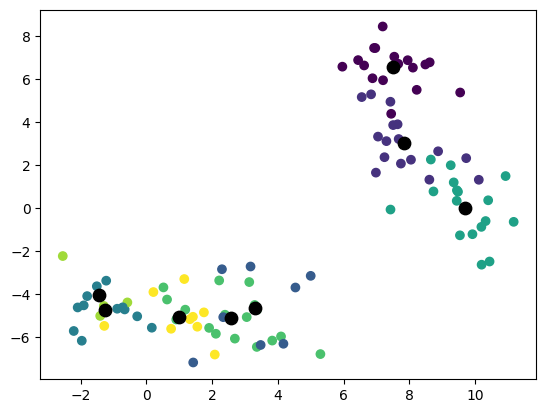

In [19]:
plt.scatter(taskx_feature, tasky_feature, c=taskcluster_labels)
plt.scatter(taskcentroids[:,0], taskcentroids[:,1], s = 80, color = 'k')

I run the KMeans using its default settings, which creates 8 clusters. For the upper cluster it is more obvious which centroid belongs to which cluster. However, in the lower clusters it is very unclear which cluster is assigned which centroid, suggesting there may be less clusters in that section. This suggests a minimum of 4 and a maximum of 7 centroids. For the next iteration I will select 6 centroids to see if this displays clearer centroid-cluster relations.

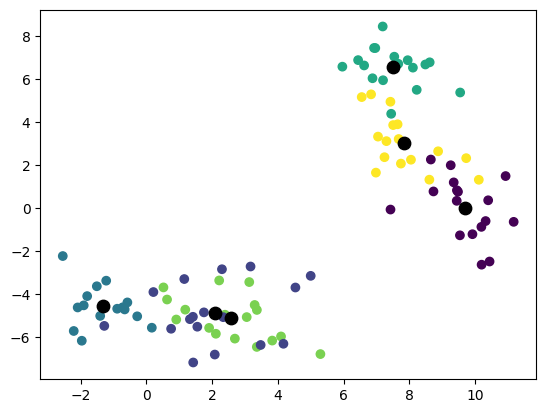

In [20]:
k_means_updated = KMeans(n_clusters=6, n_init=100, random_state=42)
updated_cluster_labels = k_means_updated.fit_predict(taskdata)
updated_centroids = k_means_updated.cluster_centers_
plt.scatter(taskx_feature, tasky_feature, c=updated_cluster_labels)
plt.scatter(updated_centroids[:,0], updated_centroids[:,1], s = 80, color = 'k')

All centroids now have a clearer relation to clusters, so we can continue to see if this is the same with GMM and therefore a posterior probability.

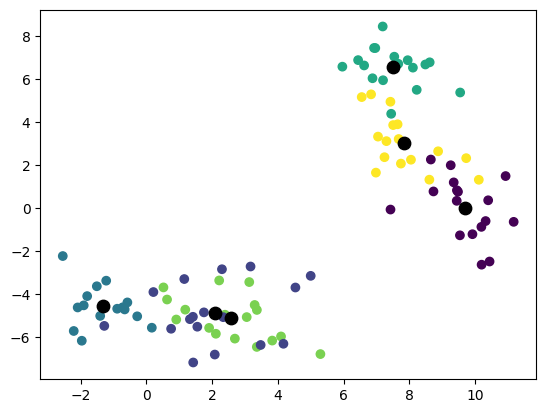

In [21]:
gm2 = GaussianMixture(n_components=6, init_params='k-means++', random_state=42)
gm2_labels = gm2.fit_predict(taskdata)
gm2_means = gm2.means_
plt.scatter(taskx_feature, tasky_feature, c = gm2_labels)
plt.scatter(gm2_means[:,0], gm2_means[:,1], s = 80, color = 'k')

The centroids and clusters have split into similair positions indicating it may the correct number of clusters.

In [22]:
posterior_probs2 = gm2.predict_proba(taskdata)

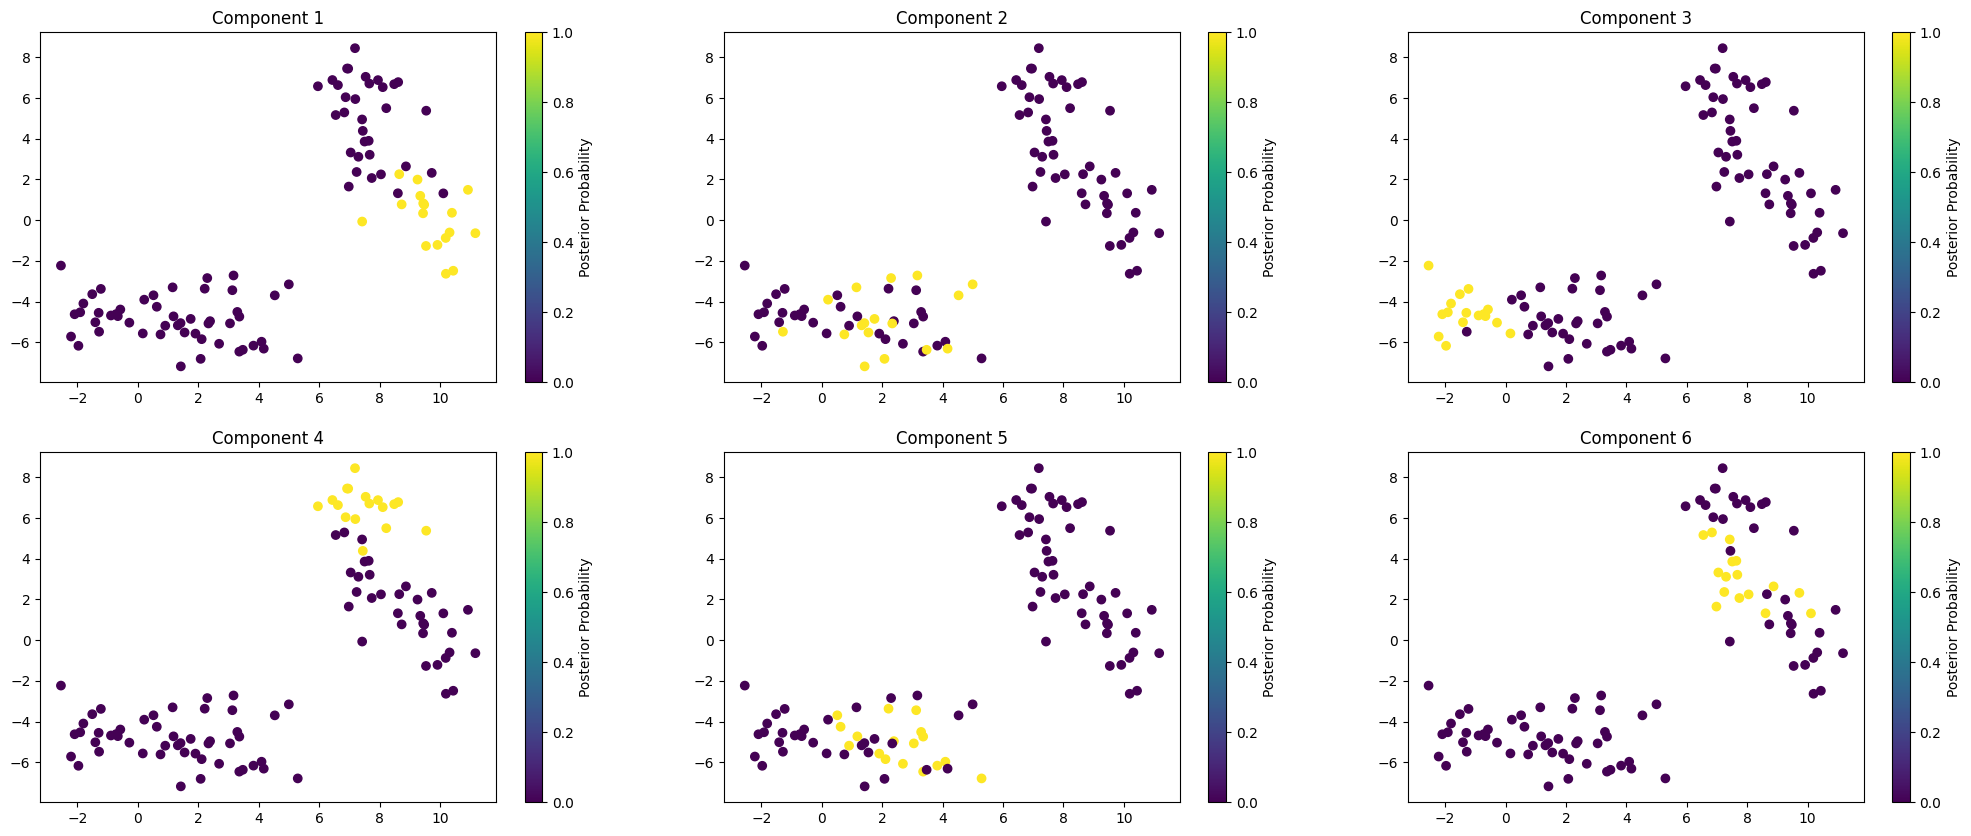

In [23]:
fig, axes = plt.subplots(2, 3, figsize=(25, 10))
axes = axes.ravel()
for i in range(6): 
    sc = axes[i].scatter(taskdata[:, 0], taskdata[:, 1], c=posterior_probs2[:, i], cmap='viridis')
    axes[i].set_title(f'Component {i+1}')
    
    plt.colorbar(sc, ax=axes[i], label='Posterior Probability')

plt.show()

The fact there is no data points that are in the middle i.e have a rating 0< or >1. Suggests we have chosen the right amount of clusters as the probabilty is 100% for each component.

# Task 2.4


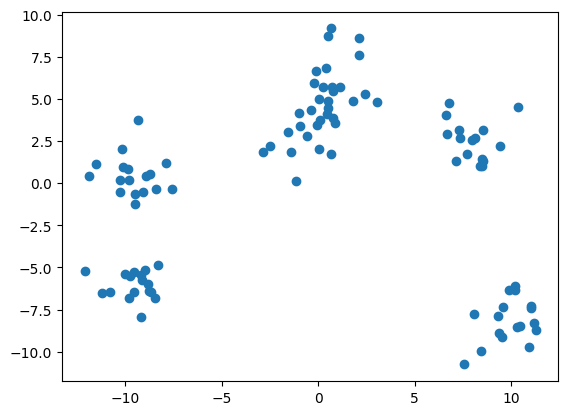

In [24]:
xfeature = taskdata[:, 4]
yfeature = taskdata[:, 5]
plt.scatter(xfeature, yfeature)

In [25]:
kmeanstask = KMeans(n_clusters=6, n_init=100, random_state=42)
taskcluster_labels = kmeanstask.fit_predict(taskdata)
taskcentroids = kmeanstask.cluster_centers_

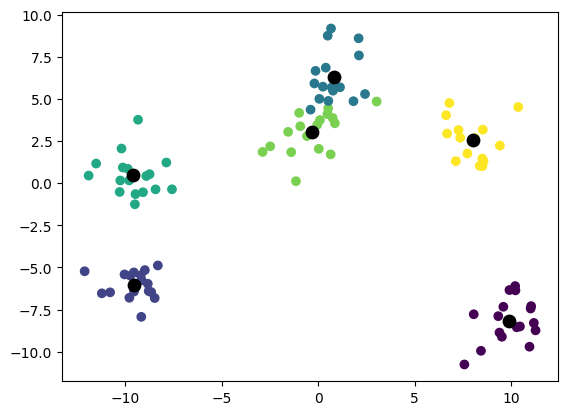

In [26]:
plt.scatter(xfeature, yfeature, c=taskcluster_labels)
plt.scatter(taskcentroids[:,4], taskcentroids[:,5], s = 80, color = 'k')

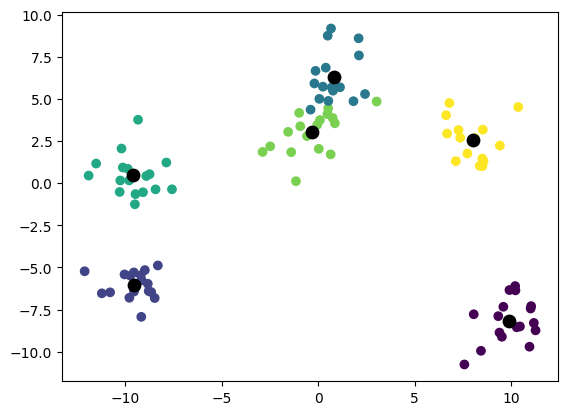

In [27]:
gm2 = GaussianMixture(n_components=6, init_params='k-means++', random_state=42)
gm2_labels = gm2.fit_predict(taskdata)
gm2_means = gm2.means_
plt.scatter(xfeature, yfeature, c = gm2_labels)
plt.scatter(gm2_means[:,4], gm2_means[:,5], s = 80, color = 'k')

In [28]:
posterior_probs2 = gm2.predict_proba(taskdata)

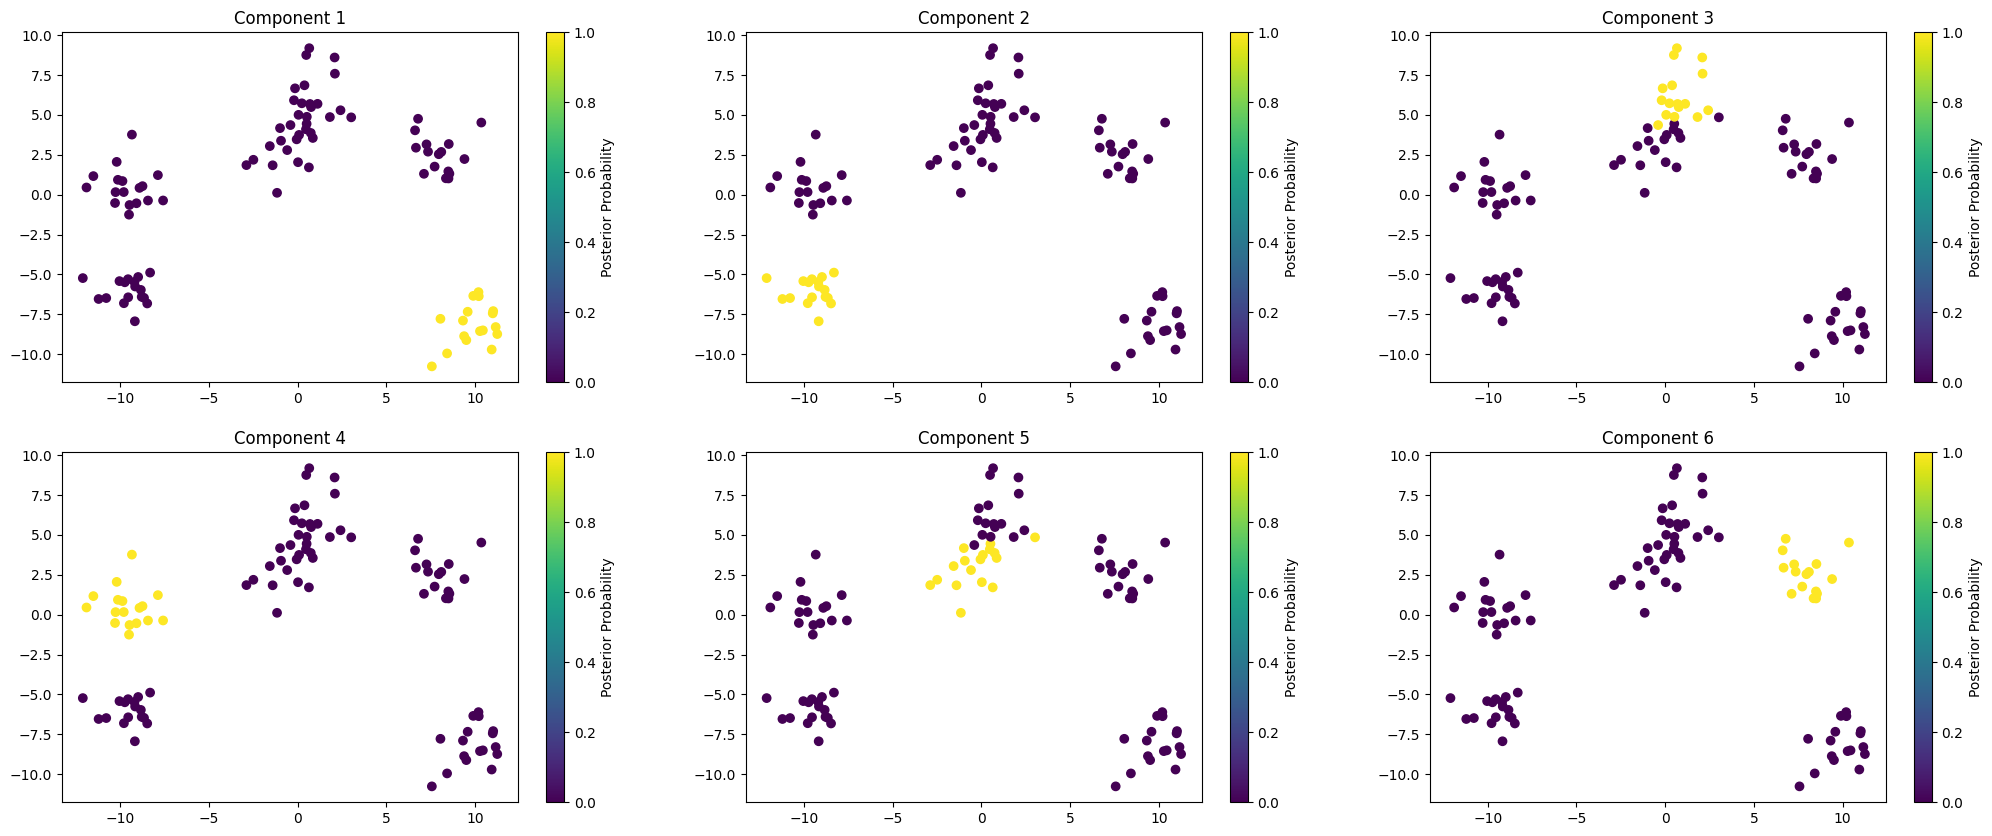

In [29]:
fig, axes = plt.subplots(2, 3, figsize=(25, 10))
axes = axes.ravel()
for i in range(6): 
    sc = axes[i].scatter(taskdata[:, 4], taskdata[:, 5], c=posterior_probs2[:, i], cmap='viridis')
    axes[i].set_title(f'Component {i+1}')
    
    plt.colorbar(sc, ax=axes[i], label='Posterior Probability')

plt.show()